# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Cosmos [ATOM] seems to be rallying, but read this before you buy in.  Crypto investors might just want to focus on the top ten coins and tokens by market cap and forget the rest. However, drastic changes are unfolding in relatively smaller but still significant projects as well. One example of this was Cosmos [ATOM], which was the #25 biggest crypto by market cap at the time of [&#8230;] ... [| Skaityti daugiau](https://ambcrypto.com/cosmos-atom-seems-to-be-rallying-but-read-this-before-you-buy-in/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Englehart doctor Patrick Phillips suspended following 'inappropriate' COVID treatments, advice, college says | CBC News.  Ontario’s College of Physicians and Surgeons (CPSO) has temporarily suspended the licence of Dr. Patrick Phillips, an emergency room doctor whose social media comments promoting misinformation during the pandemic landed him before a disciplinary committee. ... [| Skaityti daugiau](http://www.cbc.ca/news/canada/sudbury/patrick-phillips-suspended-1.6440227) 

### Kainų kaita pandemijos metu

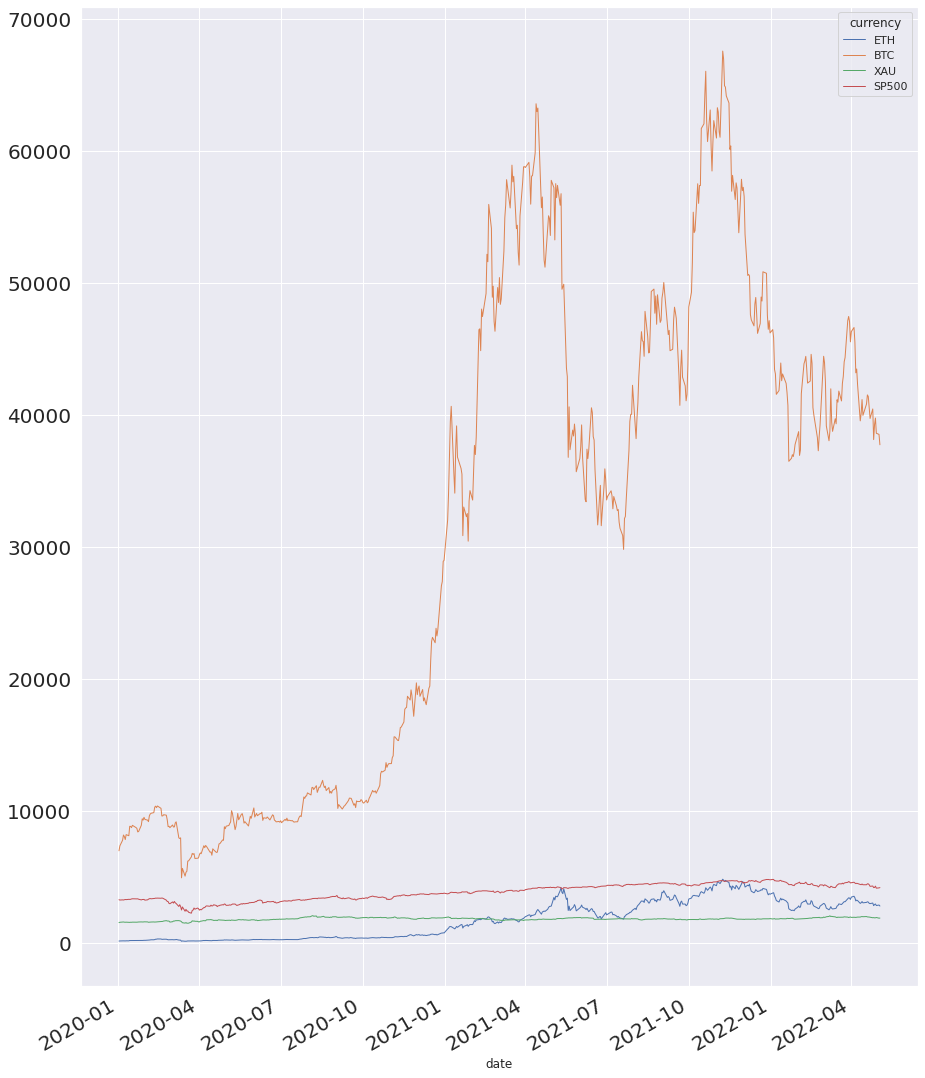

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.903910,0.245473,0.924282
BTC,0.903910,1.000000,0.196478,0.873265
XAU,0.245473,0.196478,1.000000,0.375375
SP500,0.924282,0.873265,0.375375,1.000000


In [8]:
#hide ### Koreliacijos matrica.

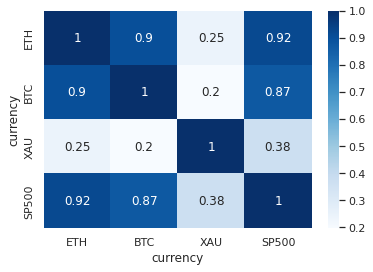

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')